# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from mpl_toolkits import mplot3d

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02b_derivatives'

# Loading data

## Train data (*smoothed & scaled*)

In [4]:
path_to_ftir_data = './../data/preprocessed_data/ftir_scaled_train.csv'

In [5]:
data = pd.read_csv(path_to_ftir_data, index_col=0)

print(data.shape)
data.head(3)

(26, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.44364,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.854160,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.00668,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.00007,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997


## Samples description

In [6]:
path_to_samples_description = './../data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, index_col=0)

samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


# Data analysis

## Selecting *train* part of sample `samples_description` 

In [8]:
samples_description = samples_description.loc[samples_description['Label'] == 'Train']

print(samples_description.shape)
samples_description.head(3)

(25, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


## Data wrangling

In [9]:
x = data.loc['wavenumber']

go_spectrum = data.loc['8']
rgo_spectrum = data.loc['10']
god_spectrum = data.loc['22']

In [10]:
spectra_color_title_lst = [
    (data.loc['8'], 'RoyalBlue', '$ОГ$ $(ID = 8)$'),
    (data.loc['10'], 'Goldenrod', '$вОГ$ $(ID = 10)$'),
    (data.loc['22'], 'SeaGreen', '$ОГ_{диализ}$ $(ID = 22)$')
]

## Specta derivatives analysis

In [11]:
fontsize = 18

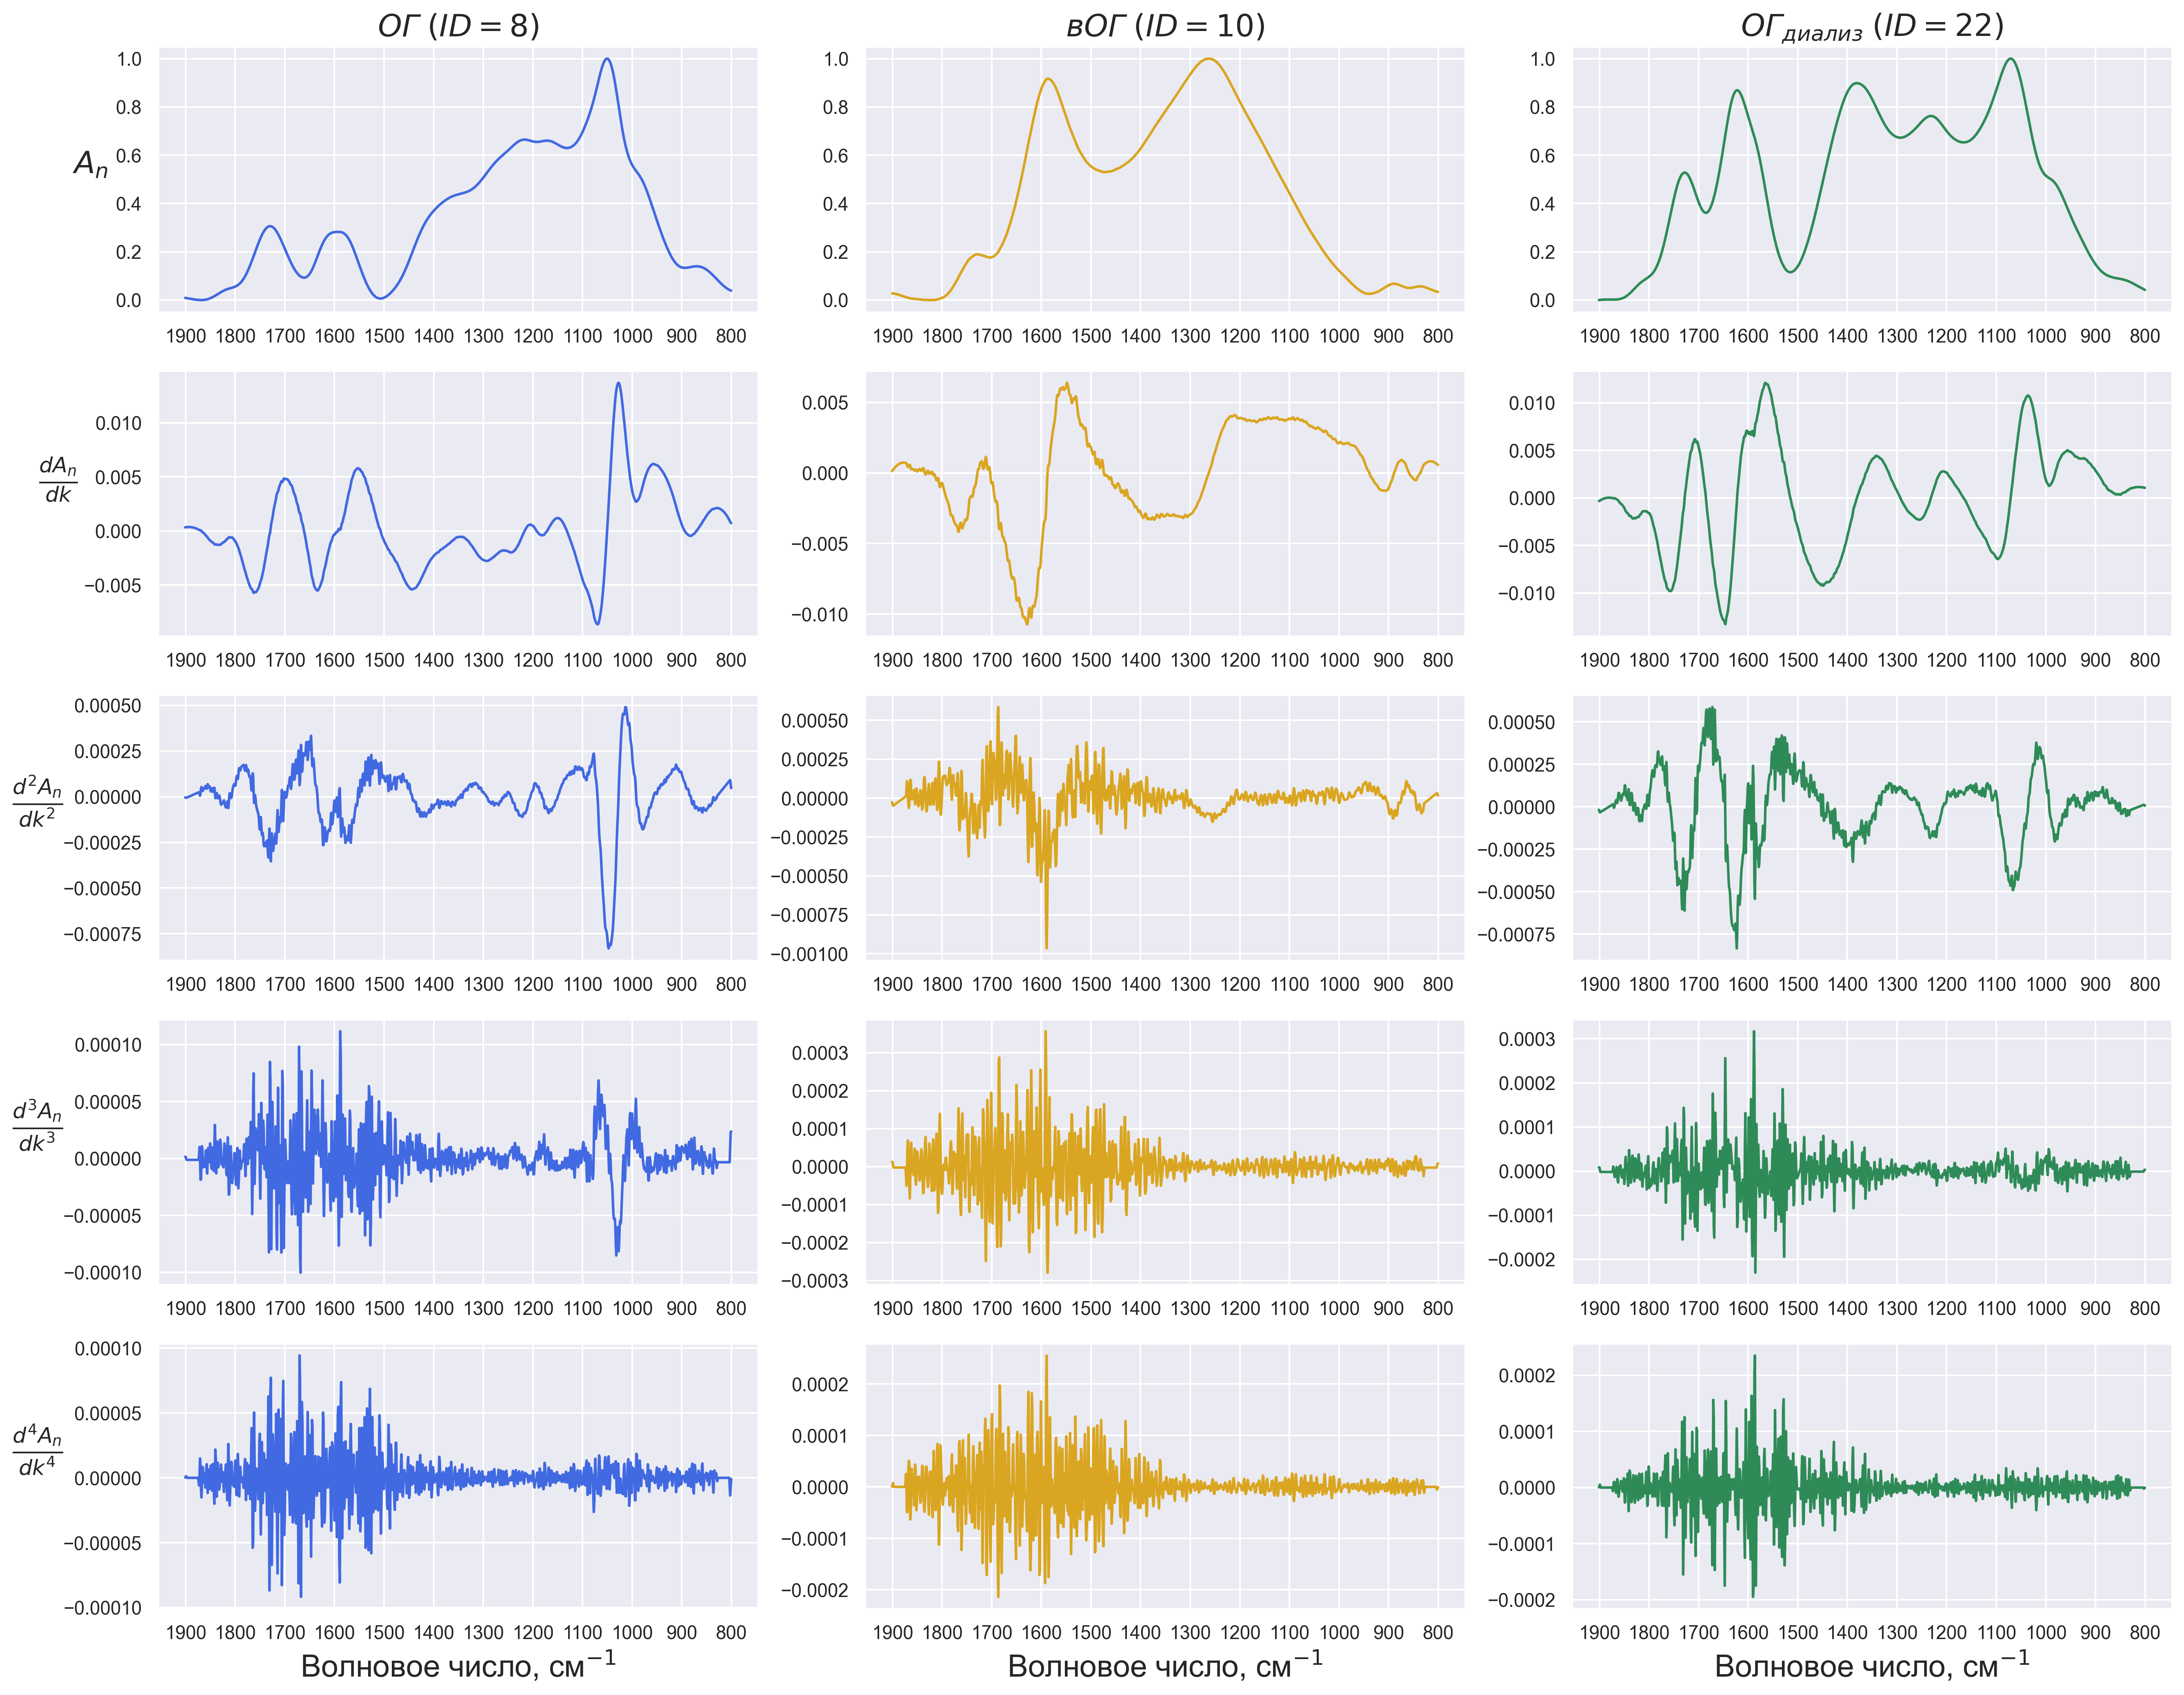

In [12]:
sns.set_theme()

nrows = 5
ncols = 3

fig = plt.figure(figsize=(18, 14), dpi=300)

for col_idx, (spectrum, color, title) in enumerate(spectra_color_title_lst):
    
    derivatives = [spectrum]
    
    for _ in range(4):
        derivaative_arr = np.gradient(derivatives[-1], x)
        derivatives.append(derivaative_arr)
    
    for row_idx, derivative in enumerate(derivatives):
        ax = plt.subplot(nrows, ncols, row_idx * ncols + col_idx + 1)
        
        ax.plot(x, derivative, color=color)
        
        if col_idx == 0:
            if row_idx == 0:
                ylabel = '$A_{n}$'
            elif row_idx == 1:
                ylabel = rf'$\frac{{dA_{{n}}}}{{dk}}$'
            else:
                ylabel = rf'$\frac{{d^{row_idx}A_{{n}}}}{{dk^{row_idx}}}$'
            ax.set_ylabel(ylabel, fontsize=fontsize, fontstyle='italic', rotation=0, labelpad=15)
        if row_idx == 0:
            ax.set_title(title, fontsize=fontsize, fontweight='bold')

        ax.invert_xaxis()
        
        ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
    
    plt.xlabel('Волновое число, см$^{-1}$', fontsize=fontsize)

plt.tight_layout()

plt.savefig(f'{path_to_save}/spectra_and_derivatives_3_types.png', dpi=900)

plt.show()